# ANALYZING EMPLOYEE EXIT SURVEY PROJECT

In this project, we'll play the role of data analyst and pretend our stakeholders want to know the following:

Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns=100
pd.options.display.min_rows=999

In [2]:
dete = pd.read_csv('datasets/dete.csv')
dete.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
dete.columns.get_indexer(['Professional Development','Health & Safety'])

array([28, 48], dtype=int64)

In [4]:
tafe = pd.read_csv('datasets/tafe.csv', encoding='latin1')
tafe.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [5]:
dete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [6]:
dete.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [7]:
print(tafe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null int64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-nu

In [8]:
tafe.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

Both datasets share some similar columns that provides an ample opportunity to merge them together coherently, although some similar columns might not share similar names eg ID in dete survey is similar to Record ID in tafe survey.

Another observation is the large number of columns in both datasets which would not be relevant to our analysis. So some cleaning is needed to discard of irrelevant columns.

In [9]:
#lets read the data once again, this time the 'Not Stated' missing values should be renamed to NaN

dete_clean = pd.read_csv('datasets/dete.csv', na_values='Not Stated')
dete_clean.head()
print(dete_clean.columns.get_indexer(['Professional Development','Health & Safety']))

[28 48]


In [10]:
tafe_clean  = pd.read_csv('datasets/tafe.csv', na_values='Not Stated', encoding='latin1')
tafe_clean.head()


,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [11]:
print(tafe_clean.columns.get_indexer(['Main Factor.     Which of these was the main factor for leaving?','Workplace. Topic:Would you recommend the Institute as an employer to others?']))

[-1 65]


In [12]:
# Now we remove columns in the dete survey that arent important to our analysis. We start with columns index 28-48

dete_clean_upd = dete_clean.drop(dete_clean.columns[28:49], axis=1)
dete_clean_upd.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [13]:
tafe_clean_upd = tafe.drop(tafe_clean.columns[15:65], axis=1)
tafe_clean_upd.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,634133009996094000,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Female,26  30,Temporary Full-time,Administration (AO),1-2,1-2
1,634133654064531000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,-,-,-,-,Travel,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,634138845606563000,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,-,-,-,-,-,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,634139903350000000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,634146578511788000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,Yes,Male,41  45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [14]:
dete_clean_upd.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

In [15]:
dete_clean_upd.columns = dete_clean_upd.columns.str.lower().str.replace(' ', '_').str.strip()
dete_clean_upd.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [16]:
 tafe_clean_upd.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Workplace. Topic:Would you recommend the Institute as an employer to others?',
       'Gender.     What is your Gender?', 'CurrentAge.     Current Age',
       'Employment Type.     Employment Type',
       'Classification.     Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at curre

In [17]:
for item in tafe_clean_upd.columns:
    item.strip().replace(' ', '').lower()
    print(item)

Record ID
Institute
WorkArea
CESSATION YEAR
Reason for ceasing employment
Contributing Factors. Career Move - Public Sector 
Contributing Factors. Career Move - Private Sector 
Contributing Factors. Career Move - Self-employment
Contributing Factors. Ill Health
Contributing Factors. Maternity/Family
Contributing Factors. Dissatisfaction
Contributing Factors. Job Dissatisfaction
Contributing Factors. Interpersonal Conflict
Contributing Factors. Study
Contributing Factors. Travel
Workplace. Topic:Would you recommend the Institute as an employer to others?
Gender.     What is your Gender?
CurrentAge.     Current Age
Employment Type.     Employment Type
Classification.     Classification
LengthofServiceOverall. Overall Length of Service at Institute (in years)
LengthofServiceCurrent. Length of Service at current workplace (in years)


In [18]:
mapping = {'Record ID': 'id', 
           'CESSATION YEAR': 'cease_date', 
           'Reason for ceasing employment': 'separationtype', 
           'Gender. \xa0\xa0\xa0\xa0What is your Gender?': 'gender', 
           'CurrentAge. \xa0\xa0\xa0\xa0Current Age': 'age',
           'Employment Type. \xa0\xa0\xa0\xa0Employment Type': 'employment_status',
           'Classification. \xa0\xa0\xa0\xa0Classification': 'position',
            'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
           'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_clean_upd = tafe_clean_upd.rename(mapping, axis = 1)

In [19]:
tafe_clean_upd.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Workplace. Topic:Would you recommend the Institute as an employer to others?',
       'gender', 'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

As we would like some uniformity in our datasets, we ensured that similar columns with different names in both datasets are mapped to the same unique column names. This makes identfication easier and prevents confusion when combining both datasets later

In [20]:
dete_clean_upd['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [21]:
tafe_clean_upd['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [22]:
dete_clean_upd['separationtype'] = dete_clean_upd['separationtype'].str.split('-').str.get(0)
dete_clean_upd['separationtype'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [23]:
tafe_res = tafe_clean_upd['separationtype'].value_counts()
tafe_res

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [24]:
dete_resign = dete_clean_upd[dete_clean_upd['separationtype'] == 'Resignation']
tafe_resign = tafe_clean_upd[tafe_clean_upd['separationtype'] == 'Resignation']


In [25]:
dete_resign

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN
12,13,Resignation,2012,1998.0,1998.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
14,15,Resignation,2012,2007.0,2010.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN
16,17,Resignation,2012,NaN,NaN,Teacher Aide,NaN,South East,NaN,Permanent Part-time,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,Male,61 or older,NaN,NaN,NaN,NaN,NaN
20,21,Resignation,2012,1982.0,1982.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,NaN
21,22,Resignation,2012,1980.0,2009.0,Cleaner,NaN,Darling Downs South West,NaN,Permanent Part-time,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,51-55,NaN,NaN,NaN,NaN,NaN


In [26]:
tafe_resign

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Workplace. Topic:Would you recommend the Institute as an employer to others?,gender,age,employment_status,position,institute_service,role_service
3,634139903350000000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,634146578511788000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,Yes,Male,41  45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,634147506906311000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,NaN,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,634152007975694000,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,-,-,-,-,-,Yes,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,634153745310374000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,No,Male,46  50,Permanent Full-time,Teacher (including LVT),3-4,3-4
8,634157899735969000,Southern Queensland Institute of TAFE,Delivery (teaching),2009.0,Resignation,-,-,-,-,-,-,-,-,-,-,Yes,Female,36  40,Temporary Full-time,Tutor,3-4,3-4
9,634158812168312000,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,-,-,-,-,-,Yes,Female,21  25,Permanent Full-time,Administration (AO),1-2,1-2
10,634158825838625000,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,-,-,-,-,-,Yes,Female,41  45,Temporary Part-time,Administration (AO),Less than 1 year,Less than 1 year
13,634172522831440000,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,Yes,Female,31  35,Temporary Full-time,Administration (AO),11-20,Less than 1 year
14,634172609223344000,Central Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,Contributing Factors. Dissatisfaction,Job Dissatisfaction,-,-,-,No,Female,31  35,Permanent Part-time,Teacher (including LVT),7-10,7-10


In [27]:
dete_resign['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
2010         1
07/2006      1
09/2010      1
Name: cease_date, dtype: int64

In [28]:
dete_resign['cease_date'] = dete_resign['cease_date'].astype('str')
dete_resign['cease_date'] = dete_resign['cease_date'].str.split('/').str[-1]
dete_resign['cease_date'] = dete_resign['cease_date'].astype('float')
dete_resign['cease_date'].value_counts().sort_index(ascending=False)

C:\Users\ADEIZA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ADEIZA\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ADEIZA\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

2014.0     22
2013.0    146
2012.0    129
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [29]:
tafe_resign['cease_date'].value_counts().sort_index(ascending=False)

2013.0     55
2012.0     94
2011.0    116
2010.0     68
2009.0      2
Name: cease_date, dtype: int64

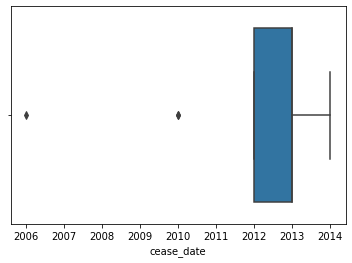

In [30]:
sns.boxplot(dete_resign['cease_date'])

In [31]:
dete_resign.shape

(311, 35)

In [32]:
dete_resign['institute_service'] = dete_resign['cease_date'] - dete_resign['dete_start_date']

C:\Users\ADEIZA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
dete_resign

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
5,6,Resignation,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
8,9,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0
9,10,Resignation,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0
11,12,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0
12,13,Resignation,2012.0,1998.0,1998.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,14.0
14,15,Resignation,2012.0,2007.0,2010.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,5.0
16,17,Resignation,2012.0,NaN,NaN,Teacher Aide,NaN,South East,NaN,Permanent Part-time,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,Male,61 or older,NaN,NaN,NaN,NaN,NaN,NaN
20,21,Resignation,2012.0,1982.0,1982.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,NaN,30.0
21,22,Resignation,2012.0,1980.0,2009.0,Cleaner,NaN,Darling Downs South West,NaN,Permanent Part-time,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,51-55,NaN,NaN,NaN,NaN,NaN,32.0


 A column showing the years of service was created for the dete survey, subtracting the start date from the cease date.

In [34]:
tafe_resign['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [35]:
tafe_resign['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

Because both columns above contain a high number of '-' values we need to convert them to something more legible for our analysis ie deciding if a value is False or True.

In [36]:
def update_val(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True
    

tafe_resign['dissatisfied'] = tafe_resign[['Contributing Factors. Job Dissatisfaction', 'Contributing Factors. Dissatisfaction']].applymap(update_val).any(1, skipna=False)
tafe_resign_up = tafe_resign.copy()

C:\Users\ADEIZA\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [37]:
tafe_resign_up

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Workplace. Topic:Would you recommend the Institute as an employer to others?,gender,age,employment_status,position,institute_service,role_service,dissatisfied
3,634139903350000000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,Yes,NaN,NaN,NaN,NaN,NaN,NaN,False
4,634146578511788000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,Yes,Male,41  45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False
5,634147506906311000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,NaN,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False
6,634152007975694000,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,-,-,-,-,-,Yes,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False
7,634153745310374000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,No,Male,46  50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False
8,634157899735969000,Southern Queensland Institute of TAFE,Delivery (teaching),2009.0,Resignation,-,-,-,-,-,-,-,-,-,-,Yes,Female,36  40,Temporary Full-time,Tutor,3-4,3-4,False
9,634158812168312000,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,-,-,-,-,-,Yes,Female,21  25,Permanent Full-time,Administration (AO),1-2,1-2,False
10,634158825838625000,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,-,-,-,-,-,Yes,Female,41  45,Temporary Part-time,Administration (AO),Less than 1 year,Less than 1 year,False
13,634172522831440000,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,Yes,Female,31  35,Temporary Full-time,Administration (AO),11-20,Less than 1 year,False
14,634172609223344000,Central Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,Contributing Factors. Dissatisfaction,Job Dissatisfaction,-,-,-,No,Female,31  35,Permanent Part-time,Teacher (including LVT),7-10,7-10,True


Using df.any() we create a new column based on the two columns that indicates if an employee resigned because of being dissatisfied.

In [38]:
# Update the values in columns related to dissatisfaction to be either True, False, or NaN
dete_resign['dissatisfied'] = dete_resign[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(1, skipna=False)
dete_resign_up = dete_resign.copy()
dete_resign_up['dissatisfied'].value_counts(dropna=False)

C:\Users\ADEIZA\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


False    162
True     149
Name: dissatisfied, dtype: int64

Now we combine both datasets, let us create a new column in each dataset with the name institute and 'DETE' AND 'TAFE' as the values respectively

In [39]:
dete_resign_up['institute'] = 'DETE'
tafe_resign_up['institute'] = 'TAFE'

In [40]:
combined = pd.concat([dete_resign_up, tafe_resign_up], ignore_index=True, sort=True)
combined

,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Dissatisfaction,Contributing Factors. Ill Health,Contributing Factors. Interpersonal Conflict,Contributing Factors. Job Dissatisfaction,Contributing Factors. Maternity/Family,Contributing Factors. Study,Contributing Factors. Travel,Institute,WorkArea,Workplace. Topic:Would you recommend the Institute as an employer to others?,aboriginal,age,business_unit,career_move_to_private_sector,career_move_to_public_sector,cease_date,classification,dete_start_date,disability,dissatisfaction_with_the_department,dissatisfied,employment_conditions,employment_status,gender,id,ill_health,institute,institute_service,interpersonal_conflicts,job_dissatisfaction,lack_of_job_security,lack_of_recognition,maternity/family,nesb,none_of_the_above,physical_work_environment,position,region,relocation,role_service,role_start_date,separationtype,south_sea,study/travel,torres_strait,traumatic_incident,work_life_balance,work_location,workload
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36-40,NaN,True,False,2012.0,Primary,2005.0,NaN,False,False,False,Permanent Full-time,Female,4,False,DETE,7,False,False,False,False,False,NaN,False,False,Teacher,Central Queensland,False,NaN,2006.0,Resignation,NaN,False,NaN,False,False,False,False
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41-45,Education Queensland,True,False,2012.0,NaN,1994.0,NaN,False,True,True,Permanent Full-time,Female,6,False,DETE,18,False,False,False,False,True,NaN,False,False,Guidance Officer,Central Office,False,NaN,1997.0,Resignation,NaN,False,NaN,False,False,False,False
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31-35,NaN,True,False,2012.0,Secondary,2009.0,NaN,False,False,False,Permanent Full-time,Female,9,False,DETE,3,False,False,False,False,False,NaN,False,False,Teacher,North Queensland,False,NaN,2009.0,Resignation,NaN,False,NaN,False,False,False,False
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46-50,NaN,False,False,2012.0,NaN,1997.0,NaN,True,True,False,Permanent Part-time,Female,10,False,DETE,15,True,True,False,False,False,NaN,False,False,Teacher Aide,NaN,False,NaN,2008.0,Resignation,NaN,False,NaN,False,False,False,False
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31-35,NaN,False,False,2012.0,Secondary,2009.0,NaN,False,False,False,Permanent Full-time,Male,12,False,DETE,3,False,False,False,False,True,NaN,False,False,Teacher,Far North Queensland,True,NaN,2009.0,Resignation,NaN,False,NaN,False,False,False,False
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36-40,NaN,False,False,2012.0,Primary,1998.0,NaN,False,False,False,Permanent Full-time,Female,13,False,DETE,14,False,False,False,False,True,NaN,False,False,Teacher,Far North Queensland,False,NaN,1998.0,Resignation,NaN,False,NaN,False,False,False,False
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31-35,NaN,False,False,2012.0,Secondary,2007.0,NaN,True,True,False,Permanent Full-time,Male,15,False,DETE,5,False,True,False,False,False,NaN,False,False,Teacher,Central Queensland,False,NaN,2010.0,Resignation,NaN,False,NaN,False,False,False,False
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61 or older,NaN,False,False,2012.0,NaN,NaN,NaN,False,True,False,Permanent Part-time,Male,17,False,DETE,NaN,False,False,False,True,False,NaN,False,False,Teacher Aide,South East,True,NaN,NaN,Resignation,NaN,False,NaN,False,False,False,False
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56-60,NaN,False,False,2012.0,Secondary,1982.0,NaN,False,False,False,Permanent Full-time,Male,21,False,DETE,30,False,False,False,False,False,NaN,True,False,Teacher,Central Queensland,False,NaN,1982.0,Resignation,NaN,False,NaN,False,False,False,False
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51-55,NaN,False,False,2012.0,NaN,1980.0,NaN,False,False,False,Permanent Part-time,Female,22,Fal

In [41]:
combined.isnull().sum().sort_values()

separationtype                                                                    0
institute                                                                         0
id                                                                                0
dissatisfied                                                                      8
cease_date                                                                       16
position                                                                         53
employment_status                                                                54
age                                                                              55
gender                                                                           59
institute_service                                                                88
Institute                                                                       311
WorkArea                                                                    

In [42]:
combined_upd = combined.dropna(thresh=500, axis=1).copy()
combined_upd

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separationtype
0,36-40,2012.0,False,Permanent Full-time,Female,4,DETE,7,Teacher,Resignation
1,41-45,2012.0,True,Permanent Full-time,Female,6,DETE,18,Guidance Officer,Resignation
2,31-35,2012.0,False,Permanent Full-time,Female,9,DETE,3,Teacher,Resignation
3,46-50,2012.0,True,Permanent Part-time,Female,10,DETE,15,Teacher Aide,Resignation
4,31-35,2012.0,False,Permanent Full-time,Male,12,DETE,3,Teacher,Resignation
5,36-40,2012.0,False,Permanent Full-time,Female,13,DETE,14,Teacher,Resignation
6,31-35,2012.0,True,Permanent Full-time,Male,15,DETE,5,Teacher,Resignation
7,61 or older,2012.0,True,Permanent Part-time,Male,17,DETE,NaN,Teacher Aide,Resignation
8,56-60,2012.0,False,Permanent Full-time,Male,21,DETE,30,Teacher,Resignation
9,51-55,2012.0,False,Permanent Part-time,Female,22,DETE,32,Cleaner,Resignation


In [43]:
combined_upd['institute_service'] = combined_upd['institute_service'].astype(str).str.extract(r'(\d+)')
combined_upd['institute_service'] = combined_upd['institute_service'].astype(float)

In [44]:
def years_service(val):
    if pd.isnull(val):
        return np.nan
    elif val <= 3:
        return 'New'
    elif val > 3 and val < 6:
        return 'Experienced'
    elif val > 6 and val < 10:
        return 'Established'
    elif val > 10:
        return 'Veteran'

In [45]:
combined_upd['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [46]:
def dissatisfied_bool(val):
    if pd.isnull(val):
        return np.nan
    elif val == True:
        return 1
    else:
        return 0

In [47]:
combined_upd['dissatisfied_bool'] = combined_upd['dissatisfied'].apply(dissatisfied_bool)
combined_upd['dissatisfied_bool']

0      0.0
1      1.0
2      0.0
3      1.0
4      0.0
5      0.0
6      1.0
7      1.0
8      0.0
9      0.0
10     1.0
11     1.0
12     1.0
13     0.0
14     1.0
15     1.0
16     0.0
17     1.0
18     0.0
19     1.0
20     0.0
21     1.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     1.0
29     0.0
      ... 
621    0.0
622    0.0
623    1.0
624    0.0
625    0.0
626    0.0
627    NaN
628    1.0
629    1.0
630    0.0
631    0.0
632    0.0
633    0.0
634    0.0
635    0.0
636    0.0
637    0.0
638    1.0
639    0.0
640    0.0
641    1.0
642    0.0
643    0.0
644    0.0
645    0.0
646    0.0
647    0.0
648    0.0
649    0.0
650    0.0
Name: dissatisfied_bool, Length: 651, dtype: float64

In [48]:
combined_upd['dissatisfied_bool'].value_counts()

0.0    403
1.0    240
Name: dissatisfied_bool, dtype: int64

In [49]:
combined_upd['service_cat'] = combined_upd['institute_service'].apply(years_service)
combined_upd['service_cat']

0      Established
1          Veteran
2              New
3          Veteran
4              New
5          Veteran
6      Experienced
7              NaN
8          Veteran
9          Veteran
10         Veteran
11         Veteran
12         Veteran
13     Established
14     Established
15            None
16             New
17             NaN
18         Veteran
19         Veteran
20             New
21         Veteran
22             New
23             New
24         Veteran
25     Experienced
26     Established
27             New
28            None
29             New
          ...     
621            New
622            New
623    Experienced
624            NaN
625            NaN
626            New
627            NaN
628            New
629            New
630            New
631            New
632            New
633            New
634            New
635            New
636            New
637            New
638            New
639    Experienced
640    Experienced
641            New
642         

In [50]:
combined_upd['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [51]:
combined_upd['dissatisfied'].fillna(False, inplace=True)

In [52]:
combined_upd['dissatisfied'].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

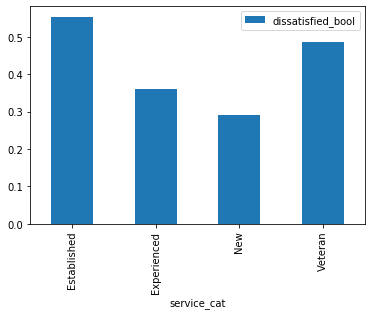

In [53]:
table = combined_upd.pivot_table(values='dissatisfied_bool', index='service_cat')
%matplotlib inline

table.plot(kind='bar')